In [1]:
DATASET_NAME = "ISBI2012_EM" # DRIVE, CVC_ClinicDB, LUNGS, ISIC2018
CFG_NAME = "Unet"
# Import libraries

import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
import numpy as np
import time
from tqdm import tqdm
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras import callbacks
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import models as M
import losses as l

Using TensorFlow backend.


In [ ]:
ROOT_DIR = os.path.abspath("./")
DATASET_FOLDER = "npys"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_FOLDER)
EXPERIMENT_NAME = "{}_{}".format(DATASET_NAME, CFG_NAME)

if not os.path.exists(os.path.join(ROOT_DIR, "logs")):
    os.mkdir(os.path.join(ROOT_DIR, "logs"))

LOG_PATH = os.path.join(ROOT_DIR, "logs", EXPERIMENT_NAME)

if not os.path.exists(LOG_PATH):
    os.mkdir(LOG_PATH)
    
print(os.listdir(DATASET_PATH))

train_data = np.load("{}/{}_images.npy".format(DATASET_PATH, DATASET_NAME)) 
train_labels = np.load("{}/{}_mask.npy".format(DATASET_PATH, DATASET_NAME))
print(train_data.shape, train_labels.shape)

In [ ]:
# Build model
model = M.g_unet(input_size = (train_data.shape[1], 
            train_data.shape[2], train_data.shape[-1]))

model.summary()

In [ ]:
# unet: 7759521
# gaussunet skip nontrainable: 7759,521 (no extra learable params)
# gaussunet skip trainable: 7763841 (gauss layers as extra learnable params)

In [2]:
import kernels as Kr

In [3]:
kernel_size = 3
sigma = 0.5

In [4]:
lpf = Kr.gauss_2D(shape=(kernel_size, kernel_size),sigma=sigma)
lpf

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

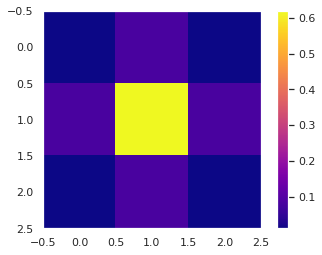

In [5]:
plt.grid(False)
plt.imshow(lpf, cmap='plasma')
plt.colorbar()

In [6]:
hpf = Kr.get_hpf()
hpf

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [8]:
blur, outline, sharpen = Kr.get_kernel()

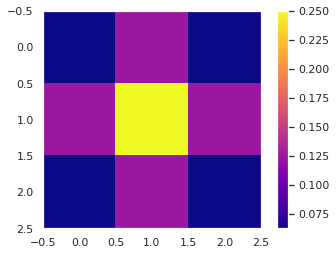

In [9]:
plt.grid(False)
plt.imshow(blur, cmap='plasma')
plt.colorbar()

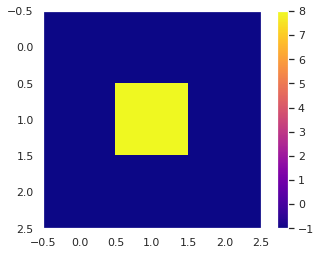

In [10]:
plt.grid(False)
plt.imshow(outline, cmap='plasma')
plt.colorbar()

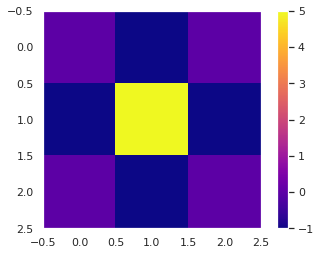

In [11]:
plt.grid(False)
plt.imshow(sharpen, cmap='plasma')
plt.colorbar()